# I. Perkenalan
> Perkenalkan nama saya Pascalis Farrel, student Hacktiv8 FTDS Batch 008.

Graded Challenge 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

# II. Import Libraries
> Cell pertama pada notebook akan diisi semua library yang digunakan dalam project, antara lain **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, **missingno**, **warnings**, **yellowbrick**, **feature_engine** dan **Scikit-Learn**.

In [321]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from feature_engine.outliers import OutlierTrimmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# III. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Dataset **CC GENERAL** merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File berada pada level pelanggan dengan 18 variabel perilaku. 

In [322]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## III.I. Data Characteristics

In [323]:
df.shape

(8950, 18)

Dataframe ini terbentuk dari:
- **8950** baris
- **18** kolom

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dari basic info ini dapat diketahui dataframe ini terdiri dari:
- 14 kolom dengan tipe float
- 3 kolom dengan tipe integer
- 1 kolom dengan tipe object

In [325]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Kebanyakan dari kolom pada dataframe memiliki distribusi yang skewed, contohnya pada kolom `PURCHASES` mean dan median kolom ini berjauhan.

## III.II. Data Cleaning

Pada proses data cleaning, dataset akan diperiksa apabila memiliki missing values.

In [326]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

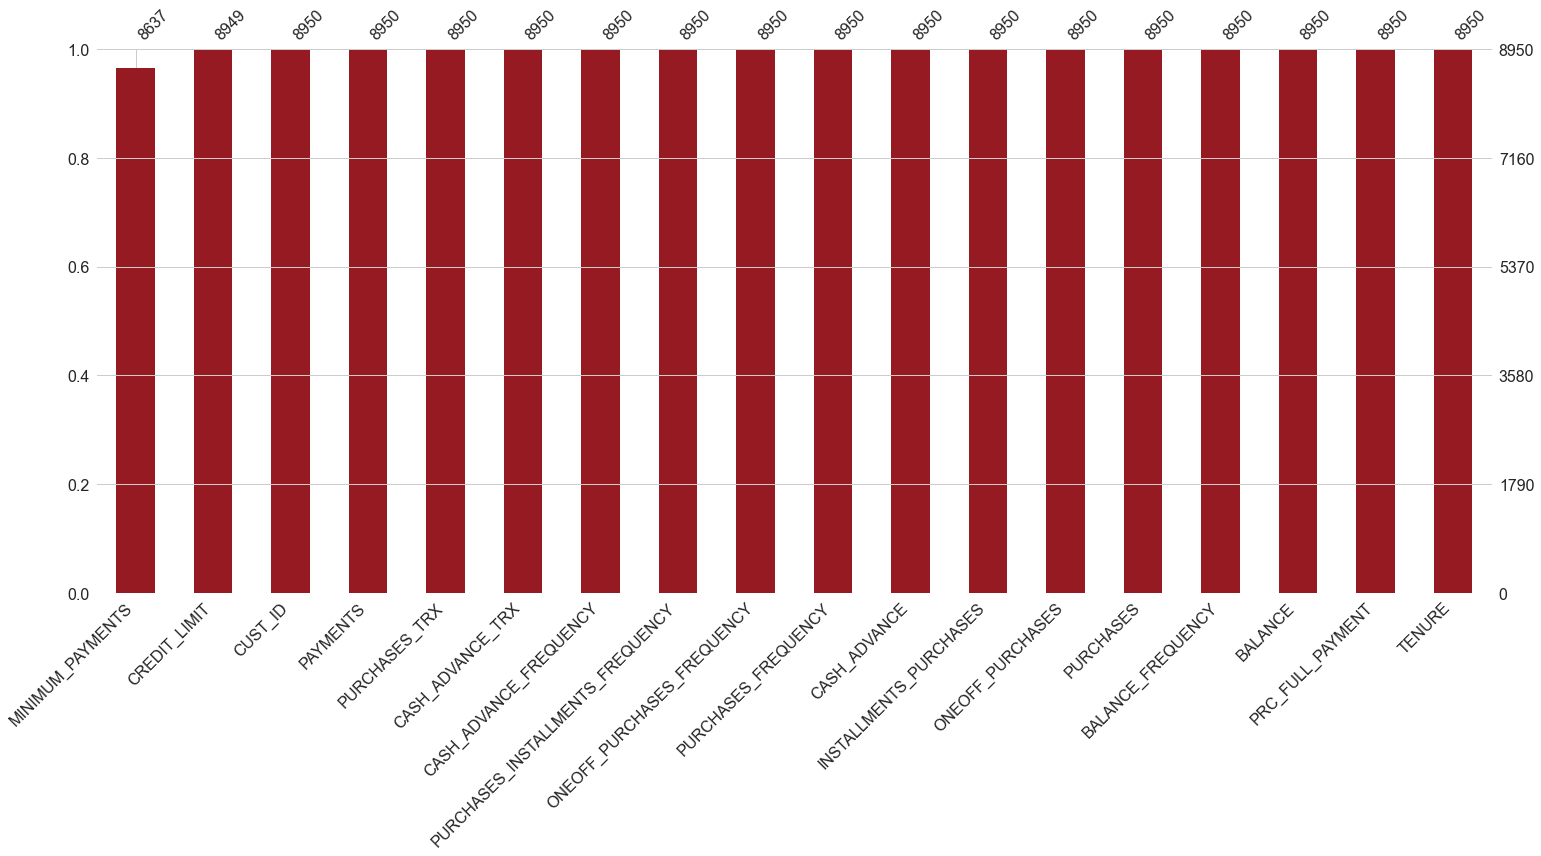

In [327]:
msno.bar(df, sort = 'ascending', color=(0.59, 0.1, 0.13))

Diketahui terdapat hanya 1 baris saja yang kosong dari kolom `credit_limit` dan hingga 313 baris yang kosong dari kolom `minimum_payments`.

## III.III. Duplicated Data

In [328]:
df.duplicated().any()

False

Diketahui bahwa dataframe tidak memiliki duplicated rows.

# IV. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

<AxesSubplot:>

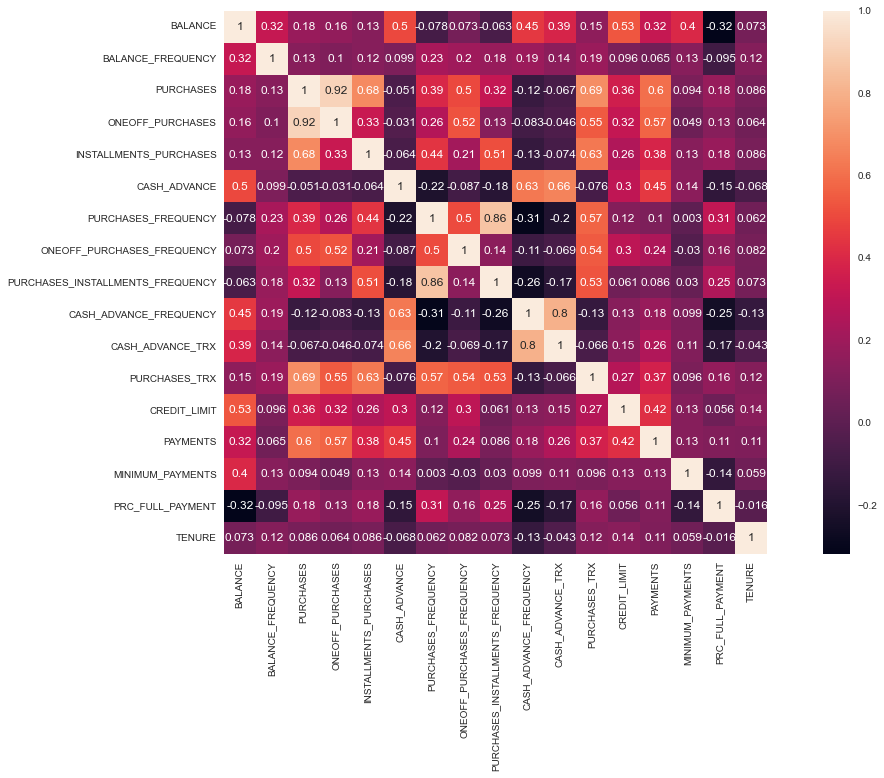

In [329]:
# Korelasi Data

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), square=True, annot=True)

Diketahui dari korelasi data kolom antar kolom, kolom `PURCHASES` dengan kolom `ONEOFF_PURCHASES`, `PURCHASES_FREQUENCY` dengan kolom `PURCHASES_INSTALLMENTS_FREQUENCY` memiliki korelasi tertinggi dengan nilai korelasi >0.85.

In [330]:
skewness = pd.DataFrame({'columns':df.describe().columns, 'skew' : df.skew(axis=0)})
skewness.reset_index(drop=True, inplace=True)

skewness['status'] = np.where(skewness['skew'].abs()>0.5, 'Skewed', 'Normal')
skewness

,columns,skew,status
0,BALANCE,2.393386,Skewed
1,BALANCE_FREQUENCY,-2.023266,Skewed
2,PURCHASES,8.144269,Skewed
3,ONEOFF_PURCHASES,10.045083,Skewed
4,INSTALLMENTS_PURCHASES,7.299120,Skewed
5,CASH_ADVANCE,5.166609,Skewed
6,PURCHASES_FREQUENCY,0.060164,Normal
7,ONEOFF_PURCHASES_FREQUENCY,1.535613,Skewed
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.509201,Skewed
9,CASH_ADVANCE_FREQUENCY,1.828686,Skewed


Diketahui semua kolom memiliki status sebgai 'Skewed' kecuali kolom 'PURCHASES_FREQUENCY' yang digolongkan normal dengan nilai skewness = 0.060164.

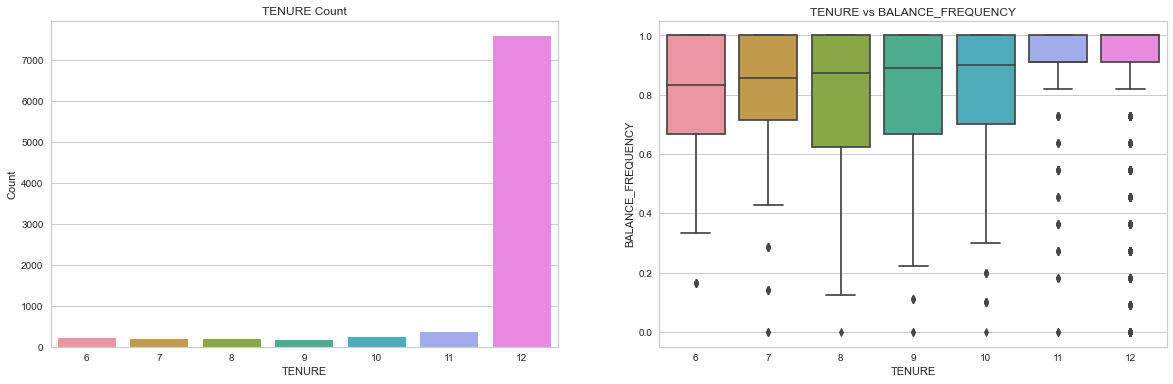

In [331]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='TENURE', data=df)
plt.title('TENURE Count')
plt.xlabel('TENURE')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(x='TENURE', y='BALANCE_FREQUENCY', data=df)
plt.title('TENURE vs BALANCE_FREQUENCY')
plt.xlabel('TENURE')
plt.ylabel('BALANCE_FREQUENCY')
plt.show()

Diketahui panjang jangka waktu layanan kartu kredit pengguna dengan value 11 dan 12 lebih sering memperbarui saldo apabila dibandingkan dengan jangka waktu/Tenure yang lainnya.

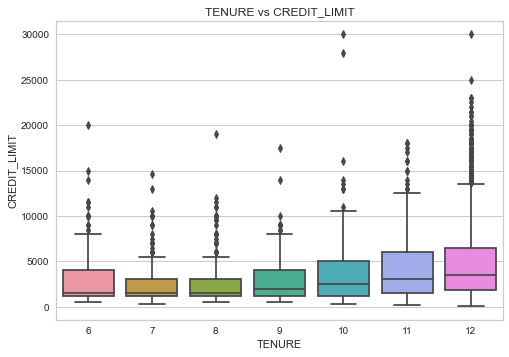

In [332]:
sns.boxplot(x='TENURE', y='CREDIT_LIMIT', data=df)
plt.title('TENURE vs CREDIT_LIMIT')
plt.xlabel('TENURE')
plt.ylabel('CREDIT_LIMIT')
plt.show()

Diketahui batas Kartu Kredit tertinggi untuk pengguna dimiliki oleh pengguna dengan jangka waktu layanan kartu kredit bervalue 12.

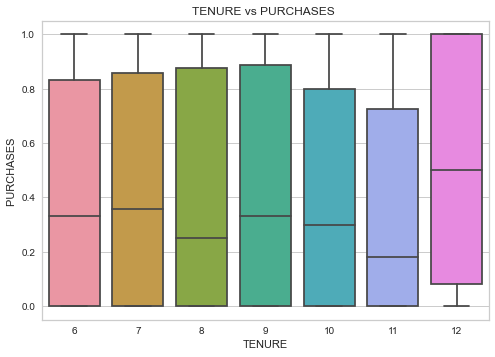

In [381]:
sns.boxplot(x='TENURE', y='PURCHASES_FREQUENCY', data=df)
plt.title('TENURE vs PURCHASES ')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES ')
plt.show()

Diketahui Jumlah pembelian yang tertinggi dilakukan dari akun pengguna yang dimiliki oleh pengguna dengan jangka waktu layanan kartu kredit bervalue 12.

# V. Data Preprocessing

In [334]:
df = df.drop('CUST_ID', axis=1)

Dikarenakan kolom `CUST_ID` merupakan identifier untuk tiap-tiap baris. Tidak ada informasi yang bisa didapatkan jika mengolah kolom ini karena tiap-tiap baris bernilai unik.

## V.I. Get Data Inference

Mengambil 10 sampel pada dataframe untuk melakukan inference.

In [335]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state=17)
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7162,4408.966613,1.000000,505.79,112.49,393.30,1601.520906,0.916667,0.166667,0.750000,0.416667,5,12,5000.0,1210.835102,1190.586570,0.0,12
6246,330.707721,0.545455,56.40,56.40,0.00,1680.231932,0.083333,0.083333,0.000000,0.166667,3,1,4000.0,3613.150681,205.305914,0.5,12
4863,3083.784255,1.000000,0.00,0.00,0.00,737.652849,0.000000,0.000000,0.000000,0.166667,2,0,5500.0,1033.581612,746.430888,0.0,12
4044,212.282538,0.545455,1698.90,1698.90,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,10,3000.0,2865.759368,191.098681,1.0,12
2264,937.276757,1.000000,45.65,45.65,0.00,19.995297,0.083333,0.083333,0.000000,0.083333,1,1,1000.0,335.809644,442.354727,0.0,12
5832,4081.115283,1.000000,1133.98,298.59,835.39,495.425832,1.000000,0.416667,1.000000,0.333333,8,42,8500.0,1532.358832,1051.311348,0.0,12
4570,2341.401664,1.000000,0.00,0.00,0.00,1818.306309,0.000000,0.000000,0.000000,0.416667,5,0,3000.0,668.918811,553.243869,0.0,12
3245,1963.239125,1.000000,67.55,0.00,67.55,1935.971876,0.250000,0.000000,0.166667,0.333333,6,3,2500.0,459.929854,543.168888,0.0,12
33,125.660453,1.000000,636.79,636.79,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,1200.0,423.449696,196.301885,0.3,12
1470,129.613905,0.636364,1083.04,1083.04,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,10,5500.0,1958.462851,87.443335,1.0,12


In [336]:
# Remove Inference-Set from Dataset

df = df.drop(df_inf.index)
df_train = df.copy()
df_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [337]:
# Reset Index
df_train.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

# Display data_inf
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4408.966613,1.000000,505.79,112.49,393.30,1601.520906,0.916667,0.166667,0.750000,0.416667,5,12,5000.0,1210.835102,1190.586570,0.0,12
1,330.707721,0.545455,56.40,56.40,0.00,1680.231932,0.083333,0.083333,0.000000,0.166667,3,1,4000.0,3613.150681,205.305914,0.5,12
2,3083.784255,1.000000,0.00,0.00,0.00,737.652849,0.000000,0.000000,0.000000,0.166667,2,0,5500.0,1033.581612,746.430888,0.0,12
3,212.282538,0.545455,1698.90,1698.90,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,10,3000.0,2865.759368,191.098681,1.0,12
4,937.276757,1.000000,45.65,45.65,0.00,19.995297,0.083333,0.083333,0.000000,0.083333,1,1,1000.0,335.809644,442.354727,0.0,12
5,4081.115283,1.000000,1133.98,298.59,835.39,495.425832,1.000000,0.416667,1.000000,0.333333,8,42,8500.0,1532.358832,1051.311348,0.0,12
6,2341.401664,1.000000,0.00,0.00,0.00,1818.306309,0.000000,0.000000,0.000000,0.416667,5,0,3000.0,668.918811,553.243869,0.0,12
7,1963.239125,1.000000,67.55,0.00,67.55,1935.971876,0.250000,0.000000,0.166667,0.333333,6,3,2500.0,459.929854,543.168888,0.0,12
8,125.660453,1.000000,636.79,636.79,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,1200.0,423.449696,196.301885,0.3,12
9,129.613905,0.636364,1083.04,1083.04,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,10,5500.0,1958.462851,87.443335,1.0,12


In [338]:
preprocess_handling = pd.DataFrame({'columns':df_train.describe().columns, 'skew' : df_train.skew(axis=0)})
preprocess_handling.reset_index(drop=True, inplace=True)

preprocess_handling['status'] = np.where(preprocess_handling['skew'].abs()>0.5, 'Skewed', 'Normal')

In [339]:
preprocess_handling

,columns,skew,status
0,BALANCE,2.394314,Skewed
1,BALANCE_FREQUENCY,-2.023896,Skewed
2,PURCHASES,8.140687,Skewed
3,ONEOFF_PURCHASES,10.041150,Skewed
4,INSTALLMENTS_PURCHASES,7.296283,Skewed
5,CASH_ADVANCE,5.164801,Skewed
6,PURCHASES_FREQUENCY,0.059533,Normal
7,ONEOFF_PURCHASES_FREQUENCY,1.535648,Skewed
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.508338,Skewed
9,CASH_ADVANCE_FREQUENCY,1.830148,Skewed


## V.III. Handling Outlier

In [340]:
#Check distribusi

distribution = pd.DataFrame(df_train.skew(axis=0), columns = ['skew']).reset_index()
distribution['dist'] = np.where((distribution['skew'] < 0.5) & (distribution['skew'] > -0.5), 'normal', 'skew')
distribution.rename(columns={'index':'columns'},inplace=True)


distribution

,columns,skew,dist
0,BALANCE,2.394314,skew
1,BALANCE_FREQUENCY,-2.023896,skew
2,PURCHASES,8.140687,skew
3,ONEOFF_PURCHASES,10.041150,skew
4,INSTALLMENTS_PURCHASES,7.296283,skew
5,CASH_ADVANCE,5.164801,skew
6,PURCHASES_FREQUENCY,0.059533,normal
7,ONEOFF_PURCHASES_FREQUENCY,1.535648,skew
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.508338,skew
9,CASH_ADVANCE_FREQUENCY,1.830148,skew


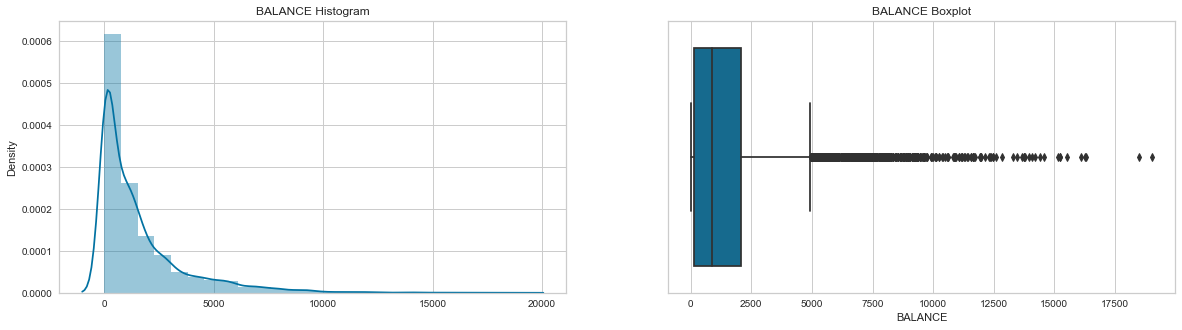

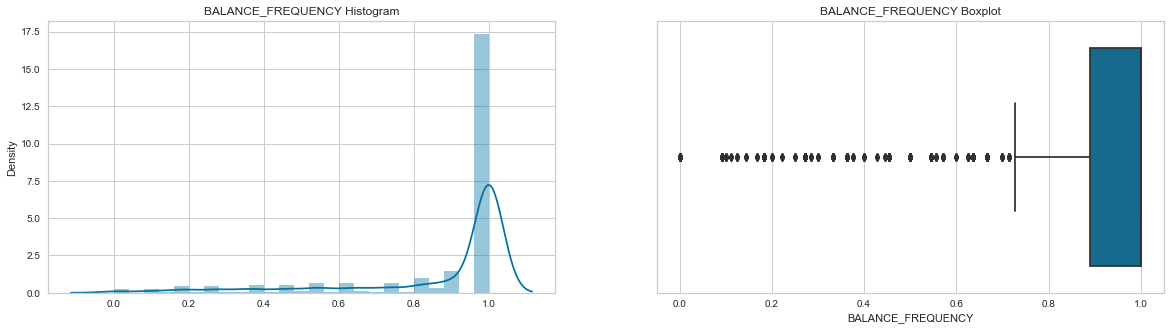

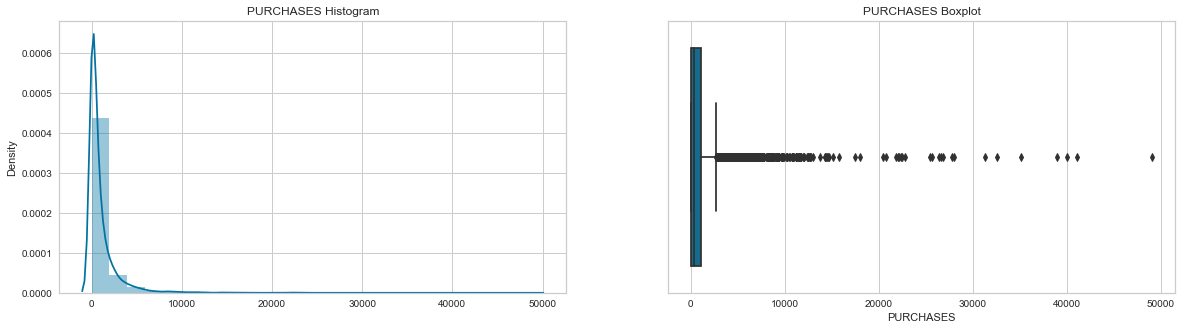

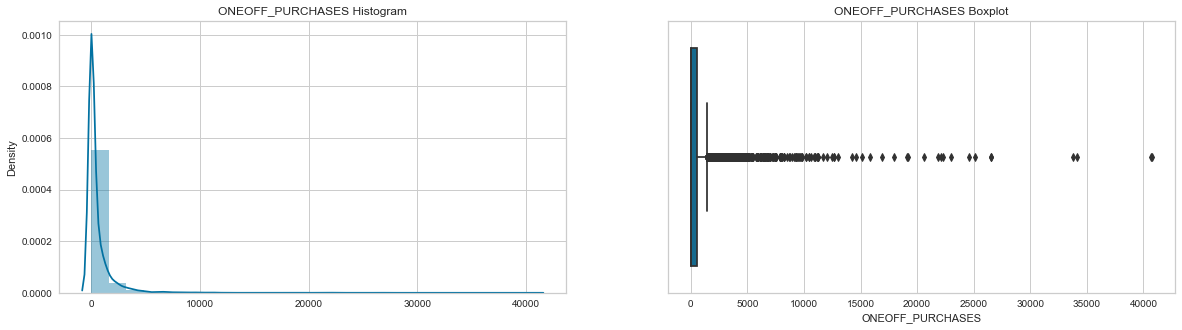

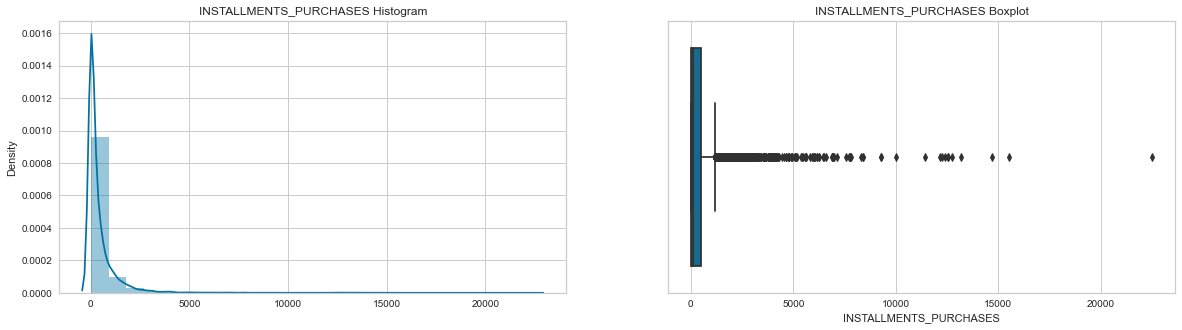

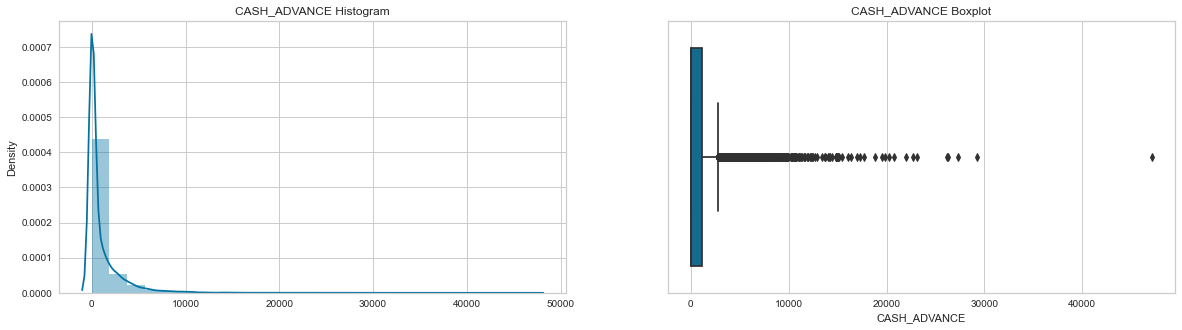

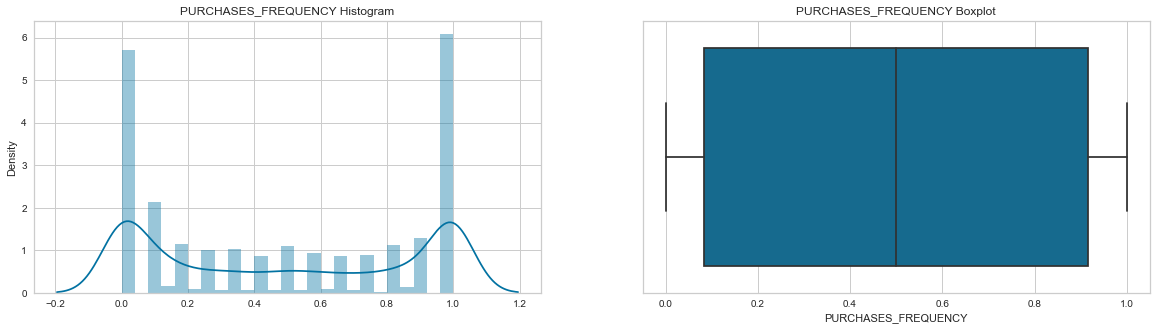

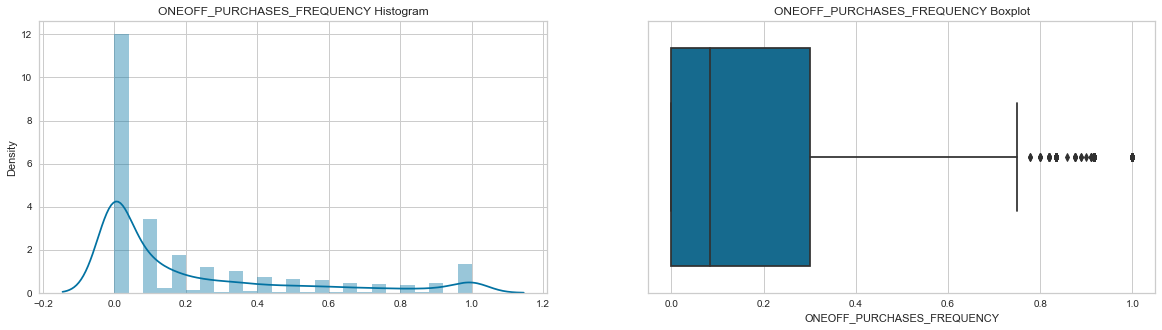

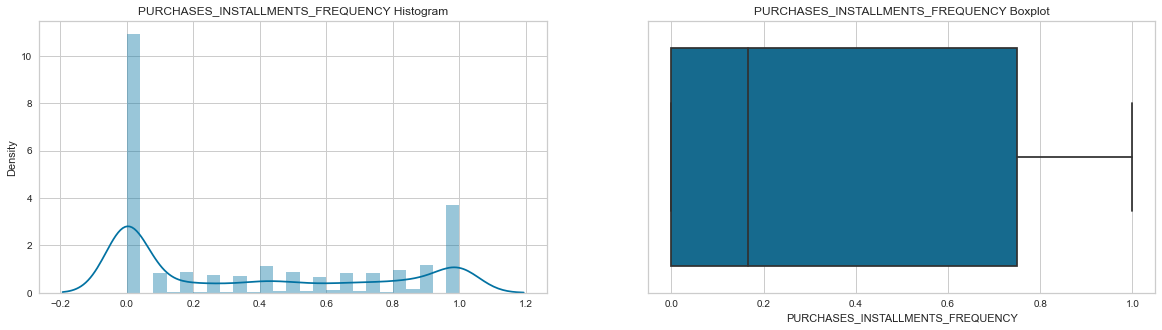

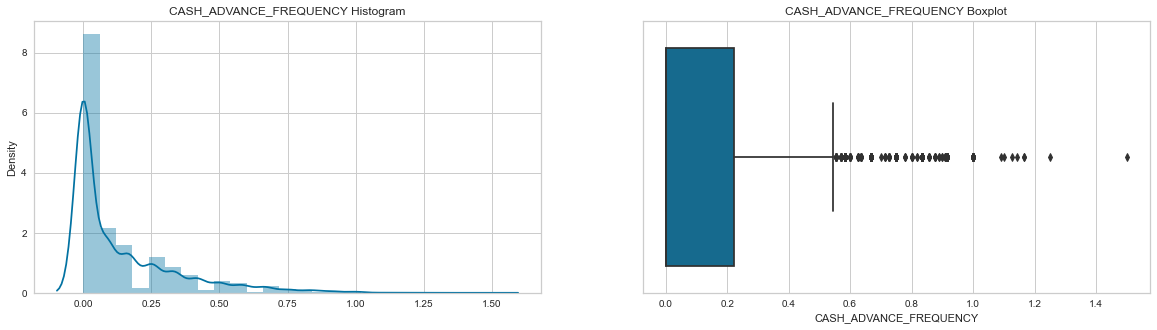

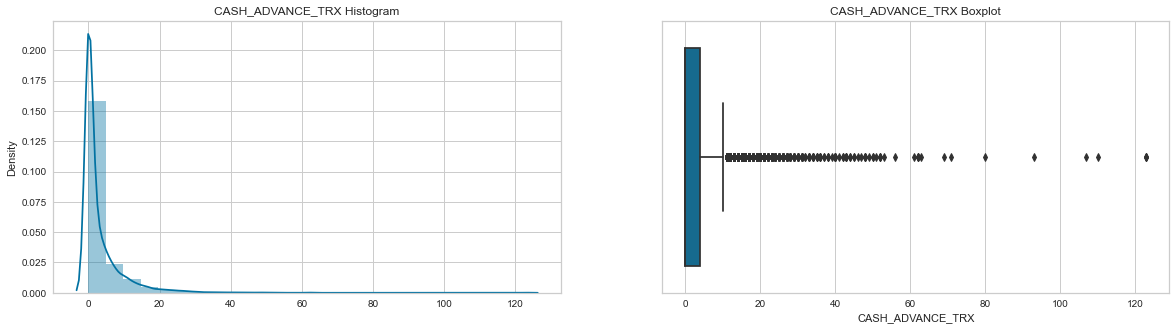

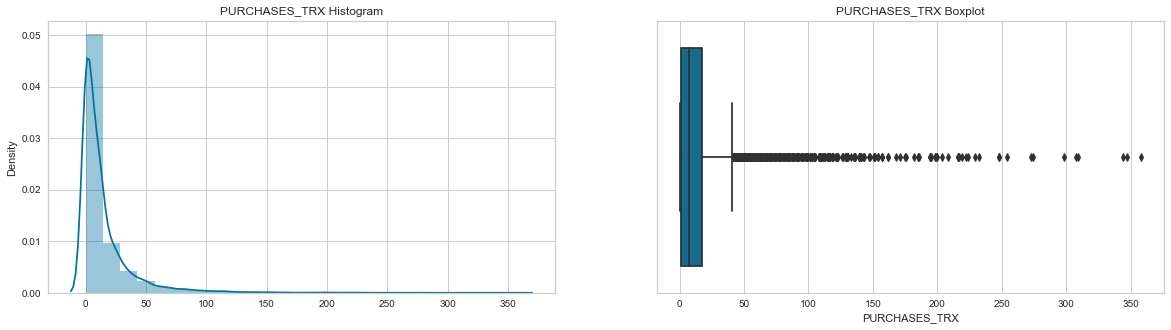

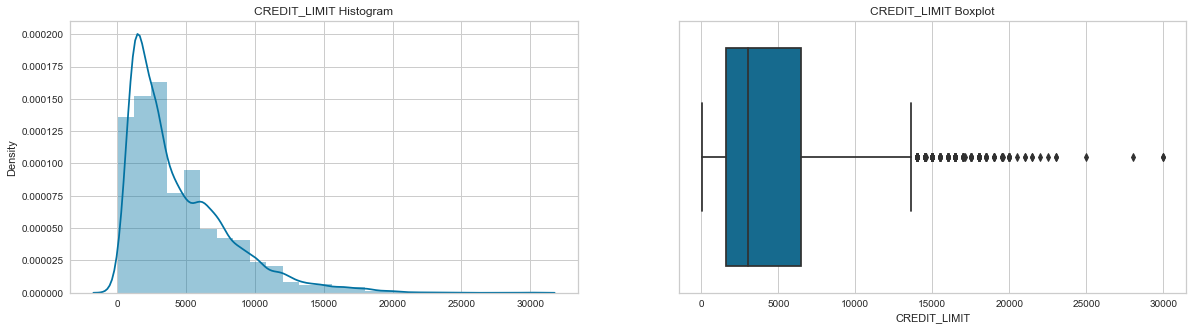

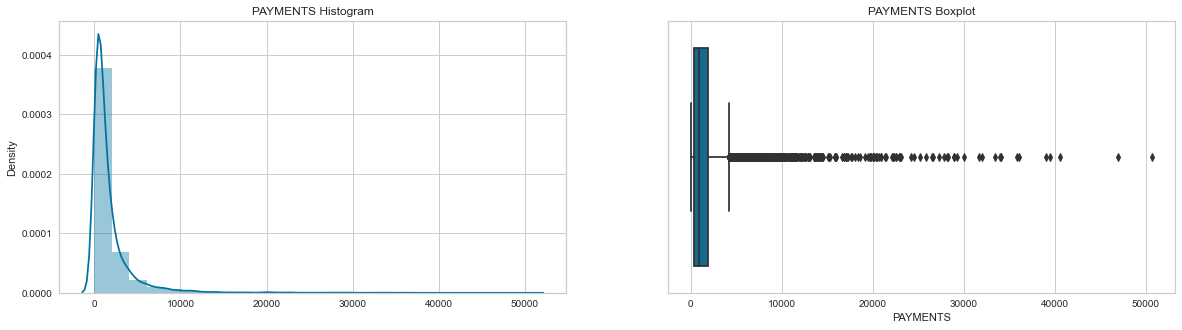

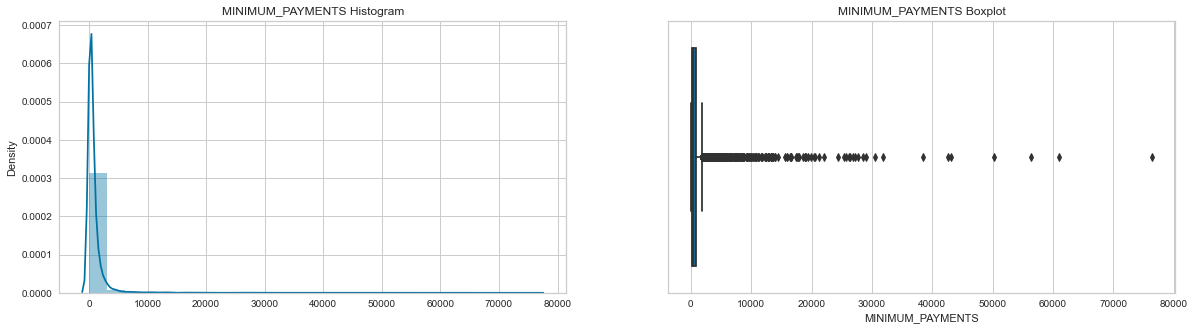

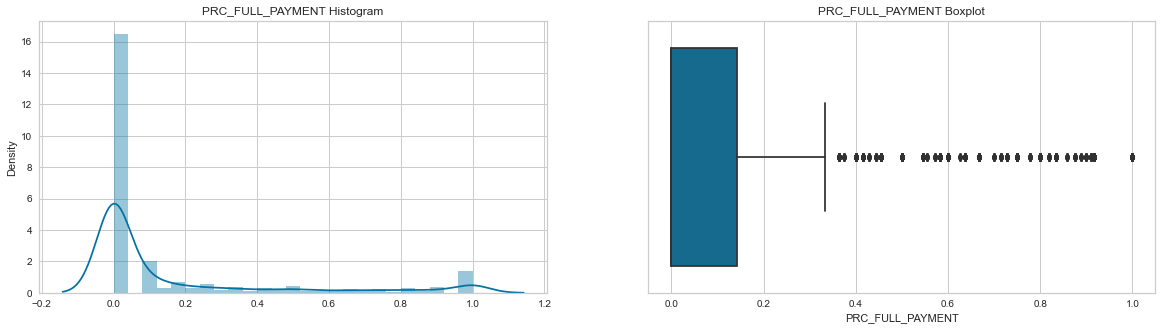

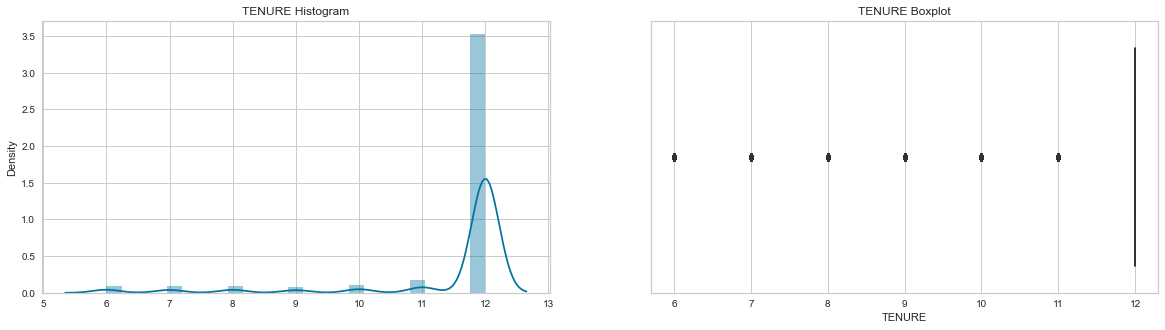

In [341]:
for row in distribution.index.tolist():
    col= distribution.iloc[row]['columns']

    fig,ax = plt.subplots(1,2, figsize=(20,5))

    sns.distplot(x=df_train[col],bins=25, ax=ax[0])
    sns.boxplot(x=df_train[col], ax=ax[1])

    ax[0].set_title(col + ' ' + 'Histogram')
    ax[1].set_title(col + ' ' + 'Boxplot')

plt.show()

In [342]:
# Fungsi untuk data yang berdistribusi tidak normal
def skew_boundaries(df, variable, distance):
    iqr = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lb = df[variable].quantile(0.25) - (iqr * distance)
    ub = df[variable].quantile(0.75) + (iqr * distance)

    return ub,lb

# Fungsi untuk data yang berdistribusi normal
def normal_boundaries(df, variable, distance):
    ub = df[variable].mean() + distance * df[variable].std()
    lb = df[variable].mean() - distance * df[variable].std()

    return ub,lb

# Membuat data set yang numerik, karena yang categorical tidak bisa dicari outliernya

num_columns = df_train.select_dtypes(include = np.number).columns.tolist()
train_num = df_train[num_columns].copy()

# Membuat kumpulan list yang nntinya akan disi oleh hasil perhitungan dan akan dibuat dataset untuk ditampilkan
outliers = {
    'columns': [],
    'upper_boundary': [],
    'lower_boundary': [],
    'total_outliers': [],
    'bigger_than_ub_percent': [],
    'lower_than_lb_percent': [],
    'total_percent': []}

# Menggunakan looping untuk mengecek outliers dari dataset yang sudah disediakan
for i in distribution.index.tolist():
    col=distribution.iloc[i]['columns']
    dist = distribution.iloc[i]['dist']
    
    if dist == 'skew':
        ub,lb = skew_boundaries(df_train,col,1.5)
    else:
        ub,lb = normal_boundaries(df_train,col,3)

    total = len(train_num[train_num[col] > ub]) + len(train_num[train_num[col] < lb])
    ubpercent = len(train_num[train_num[col] > ub])/len(train_num) * 100
    lbpercent = len(train_num[train_num[col] < lb])/len(train_num) * 100
    totalpercent = ubpercent + lbpercent

    # Memasukan hasil perhitungan outliers kelist
    outliers['columns'].append(col)
    outliers['upper_boundary'].append(ub)
    outliers['lower_boundary'].append(lb)
    outliers['total_outliers'].append(total)
    outliers['bigger_than_ub_percent'].append(ubpercent)
    outliers['lower_than_lb_percent'].append(lbpercent)
    outliers['total_percent'].append(totalpercent)

# Membuat kumpulan list menjadi sebuah data set baru
outliers = pd.DataFrame(outliers)
outliers = pd.merge(outliers,distribution)
outliers

,columns,upper_boundary,lower_boundary,total_outliers,bigger_than_ub_percent,lower_than_lb_percent,total_percent,skew,dist
0,BALANCE,4939.317383,-2758.583353,697,7.796421,0.000000,7.796421,2.394314,skew
1,BALANCE_FREQUENCY,1.166666,0.722223,1490,0.000000,16.666667,16.666667,-2.023896,skew
2,PURCHASES,2716.226250,-1566.423750,808,9.038031,0.000000,9.038031,8.140687,skew
3,ONEOFF_PURCHASES,1441.387500,-864.832500,1013,11.331096,0.000000,11.331096,10.041150,skew
4,INSTALLMENTS_PURCHASES,1172.587500,-703.552500,867,9.697987,0.000000,9.697987,7.296283,skew
5,CASH_ADVANCE,2783.927125,-1670.356275,1032,11.543624,0.000000,11.543624,5.164801,skew
6,PURCHASES_FREQUENCY,1.694597,-0.713657,0,0.000000,0.000000,0.000000,0.059533,normal
7,ONEOFF_PURCHASES_FREQUENCY,0.750000,-0.450000,781,8.736018,0.000000,8.736018,1.535648,skew
8,PURCHASES_INSTALLMENTS_FREQUENCY,1.875000,-1.125000,0,0.000000,0.000000,0.000000,0.508338,skew
9,CASH_ADVANCE_FREQUENCY,0.555555,-0.333333,525,5.872483,0.000000,5.872483,1.830148,skew


In [343]:
# Handling outliers with OutlierTrimmer
print('df train shape before trimming:', df_train.shape)

trimmer = OutlierTrimmer(capping_method = 'iqr',
                        tail='both',
                        fold=1.5,
                        variables = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'],
                        missing_values= 'ignore')
                        
trimmer.fit(df_train)
df_train_clean = trimmer.transform(df_train)
df_train_clean.reset_index(drop=True, inplace=True)
print('df train shape after trimming:', df_train_clean.shape)  

df train shape before trimming: (8940, 17)
df train shape after trimming: (2987, 17)


## V.IV. Handling Missing Values

Karena terdapat missing value pada kolom `MINIMUM_PAYMENTS`, maka pada bagian ini akan dilakukan handling terhadap baris yang memilki missing value pada kolom `MINIMUM_PAYMENTS`.

In [344]:
df_train_clean.isna().sum()

BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    49
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

In [345]:
df_inf.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [346]:
for i in df_train_clean.describe().columns:
    if df_train_clean[i].skew() < -0.5 or df_train_clean[i].skew() > 0.5:
        df_train_clean[i].fillna(df_train_clean[i].median(), inplace=True)
    else:
        df_train_clean[i].fillna(df_train_clean[i].mean(), inplace=True)

df_train_clean.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## V.V. Feature Selection

In [347]:
df_vif = pd.DataFrame()
df_vif["feature"] = df_train_clean.columns
  
# calculating VIF for each feature
df_vif["VIF"] = [variance_inflation_factor(df_train_clean.values, i)
                          for i in range(len(df_train_clean.columns))]

df_vif.sort_values(by="VIF", inplace=True)

df_vif

,feature,VIF
1,BALANCE_FREQUENCY,1.176627
15,PRC_FULL_PAYMENT,1.327855
12,CREDIT_LIMIT,1.328767
13,PAYMENTS,1.332717
5,CASH_ADVANCE,2.220687
14,MINIMUM_PAYMENTS,2.774237
0,BALANCE,3.754508
11,PURCHASES_TRX,5.961264
7,ONEOFF_PURCHASES_FREQUENCY,6.160454
9,CASH_ADVANCE_FREQUENCY,6.350895


- Diketahui kolom yang memiliki nilai VIF > 5.0 adalah kolom `PURCHASES_TRX`, `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`, `CASH_ADVANCE_TRX`, `PURCHASES`, `PURCHASES_INSTALLMENTS_FREQUENCY`, `TENURE`, `INSTALLMENTS_PURCHASES`, dan `ONEOFF_PURCHASES`, dimana kolom tersebut dapat digabungkan.
- Dengan ini dapat diprediksi bahwa komponen yang akan dibawakan dalam PCA minimal terdiri dari 7+1=8 dimensi.

In [348]:
# Feature Scaling Using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_train_clean)

df_train_scaled = scaler.transform(df_train_clean)
df_train_scaled_viz = df_train_scaled.copy()

In [349]:
df_pca = PCA(n_components=0.8)
df_train_scaled = df_pca.fit_transform(df_train_scaled)

df_train_scaled.shape

(2987, 5)

Hasil PCA menunjukkan dimensi yang akan digunakan pada permodelan clustering direduksi atau dipadatkan hingga 5 dimensi

# VI. Model Definition
> Akan dibuat `model` untuk **KMeans**, **Agglomerative Clustering**, dan **Spectral Clustering**.

In [350]:
model_km = KMeans(n_clusters=5, random_state=4)
model_agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
model_spec = SpectralClustering(n_clusters=5, random_state=4)

# VII. Model Training
> Seteah model dibuat, selanjutnya setiap model akan dilatih menggunakan data trainnya masing-masing.

In [351]:
model_km.fit(df_train_scaled)

KMeans(n_clusters=5, random_state=4)

In [352]:
model_agg.fit(df_train_scaled)

AgglomerativeClustering(n_clusters=5)

In [353]:
model_spec.fit(df_train_scaled)

SpectralClustering(n_clusters=5, random_state=4)

# VIII. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

## KMeans

In [354]:
model_km.cluster_centers_

array([[-3.71511570e-01, -2.80725470e-01, -3.25464327e-02,
        -7.88635568e-02, -2.83900430e-03],
       [ 7.18495004e-01, -9.16477777e-04, -3.13156713e-01,
        -1.89272925e-02,  2.02340481e-02],
       [ 8.87755388e-01,  3.64796011e-01,  4.74909738e-01,
         5.48384482e-02, -3.01422633e-02],
       [ 8.74748068e-02, -1.54513825e-01,  5.23485276e-01,
         5.08335474e-02, -1.38121871e-02],
       [-6.49346576e-01,  3.75157387e-01, -8.99960794e-02,
         8.70133748e-02,  7.66553798e-04]])

In [355]:
model_label_km = pd.DataFrame(model_km.labels_, columns=['km_labels'])
model_label_km

,km_labels
0,0
1,0
2,1
3,3
4,0
...,...
2982,3
2983,1
2984,1
2985,1


In [356]:
model_label_km.value_counts('km_labels')

km_labels
0    961
1    739
4    651
3    395
2    241
dtype: int64

In [357]:
model_km.inertia_

853.59523183871

Text(0, 0.5, 'wcss')

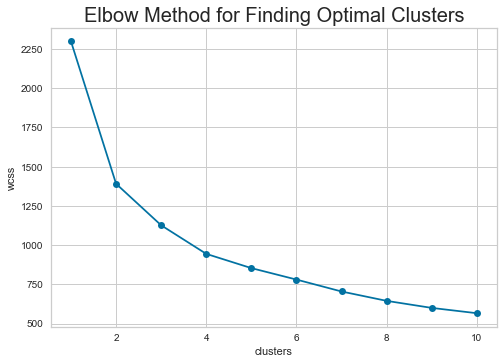

In [358]:
wcss= []

for i in range(1,11): 
    kmeans_per_k = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans_per_k.fit(df_train_scaled)
    wcss.append(kmeans_per_k.inertia_)
    
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('clusters')
plt.ylabel('wcss')

Diketahui penambahan jumlah cluster setelah cluster ke-4 berhenti menunjukkan penuruanan nilai wcss yang banyak atau selisihnya semakin sedikit. Maka dari itu jumlah cluster 4-6 akan dianggap sebagai cluster optimal dan digunakan pada tahap-tahap selanjutnya.

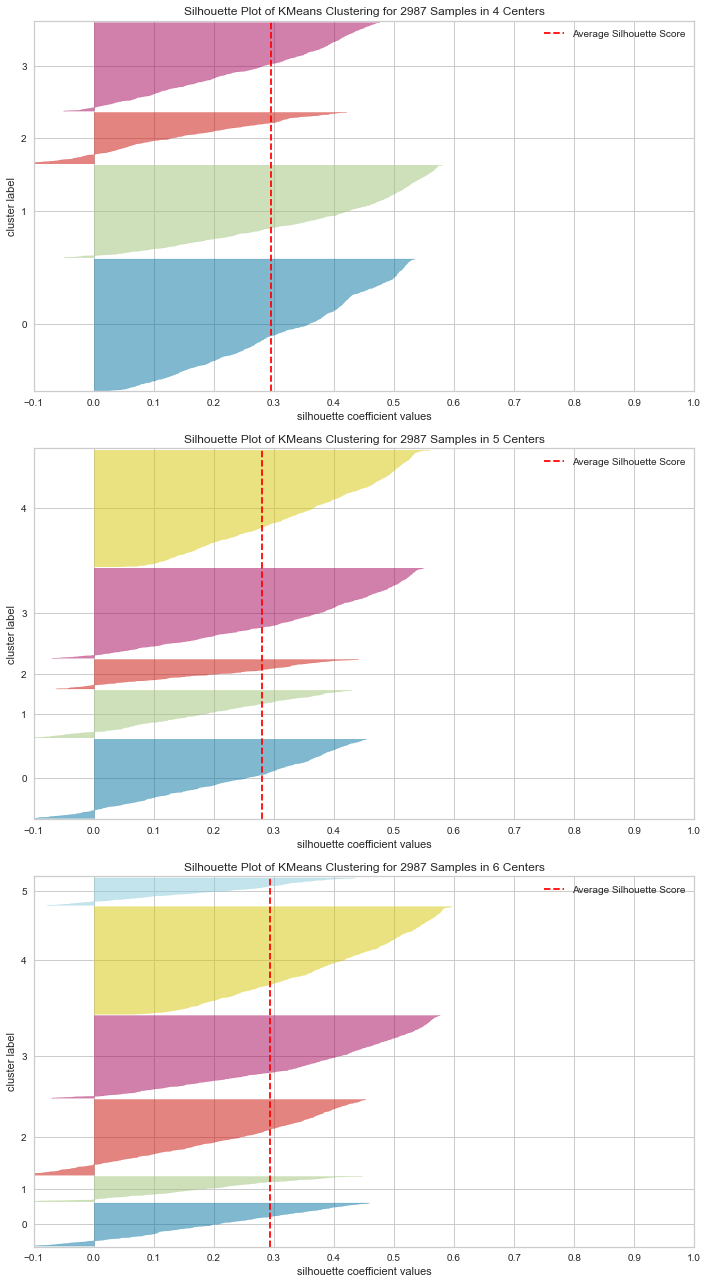

In [359]:
k_range = range(4, 7)
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

for i in k_range:   
    model = KMeans(i, init='k-means++', n_init=100, random_state=4)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=axes[i-4])
    visualizer.fit(df_train_scaled)
    visualizer.finalize()
    axes[i-4].set_xlim(-0.1, 1)
    
plt.tight_layout()

Diketahui dari bentuk silhouette plot, cluster ke-4 memiliki peta pengelompokkan yang paling baik, dimana gap yang dihasilkan antar cluster tidak memiliki perbedaan yang sangat signifikan

In [360]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=4).fit(df_train_scaled)
                for k in range(2, 10)]

silhouette_coeff = [silhouette_score(df_train_scaled, model.labels_)
                     for model in kmeans_per_k[0:]]

sil_score_table = pd.DataFrame(columns=['k(cluster)', 'silhouette_coefficient'])

for i in silhouette_coeff:
    sil_score_table.loc[i]=[silhouette_coeff.index(i)+2, i]

sil_score_table.reset_index(drop=True, inplace=True)
sil_score_table

,k(cluster),silhouette_coefficient
0,2.0,0.378788
1,3.0,0.281493
2,4.0,0.294280
3,5.0,0.281032
4,6.0,0.293846
5,7.0,0.298030
6,8.0,0.286566
7,9.0,0.277616


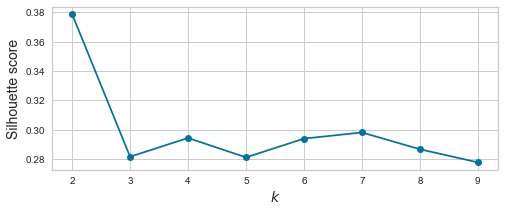

In [361]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_coeff, marker='o')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Diketahui dari shiloutte coeffecient, cluster ke-5 dan 7 memiliki selisih silhouette coeffecient yang terkecil, namun cluster ke-2 dan ke-3 memiliki selisih yang sangat besar.

## Agglomerative Clustering

In [362]:
model_label_agg = pd.DataFrame(model_agg.labels_, columns=['agg_labels'])
model_label_agg

,agg_labels
0,4
1,3
2,1
3,3
4,3
...,...
2982,3
2983,1
2984,4
2985,4


In [363]:
model_label_agg.value_counts('agg_labels')

agg_labels
1    900
3    889
2    565
0    403
4    230
dtype: int64

## Spectral Clustering

In [364]:
model_label_spec = pd.DataFrame(model_spec.labels_, columns=['spec_labels'])
model_label_spec

,spec_labels
0,2
1,2
2,0
3,2
4,2
...,...
2982,2
2983,0
2984,1
2985,1


In [365]:
model_label_spec.value_counts('spec_labels')

spec_labels
2    1378
0     594
4     517
3     257
1     241
dtype: int64

## Model Comparison

In [367]:
kmeans_group = model_label_km.value_counts('km_labels').reset_index(level='km_labels')
agglo_group = model_label_agg.value_counts('agg_labels').reset_index(level='agg_labels')
scl_group = model_label_spec.value_counts('spec_labels').reset_index(level='spec_labels')
s2s_label = pd.concat([kmeans_group, agglo_group, scl_group], axis=1)
s2s_label.columns = ['km_labels', 'count', 'agg_labels', 'count', 'spec_labels', 'count']
s2s_label

,km_labels,count,agg_labels,count,spec_labels,count
0,0,961,1,900,2,1378
1,1,739,3,889,0,594
2,4,651,2,565,4,517
3,3,395,0,403,3,257
4,2,241,4,230,1,241


In [382]:
df_final = pd.concat([df_train_clean, model_label_agg], axis=1)
df_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,agg_labels
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
2,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1
3,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,3
4,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,981.286008,1.000000,1370.00,1370.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1400.0,596.685481,451.584847,0.000000,12,3
2983,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1500.0,511.637312,175.012705,0.000000,12,1
2984,16.428326,0.909091,441.50,124.70,316.80,0.000000,1.000000,0.166667,0.916667,0.000000,0,14,1000.0,482.547848,91.328536,0.333333,12,4
2985,67.377243,1.000000,295.00,0.00,295.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,245.689379,167.126034,0.300000,12,4


Dikarenakan model Agglomerative Clustering memiliki selisih count terkecil antar label, maka model clustering ini akan digunakan sebagai model yang optimal.

## Cluster Analysis

In [368]:
df_final.agg_labels.value_counts()

1    900
3    889
2    565
0    403
4    230
Name: agg_labels, dtype: int64

In [369]:
pca = PCA(n_components=2)
pca_viz = pca.fit_transform(df_train_scaled_viz)
pca_df = pd.DataFrame.from_records(data=pca_viz, columns=["x1","x2"])
pca_df["labels"] = model_agg.labels_ + 1

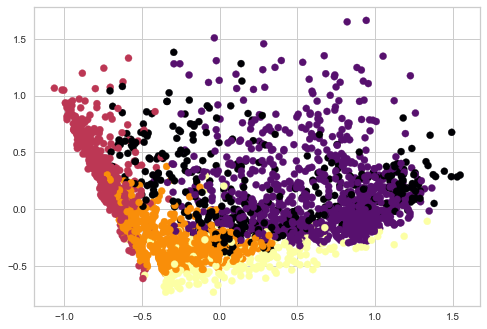

In [370]:
plt.scatter(pca_df['x1'], pca_df['x2'], c=pca_df['labels'], s=50, cmap='inferno')

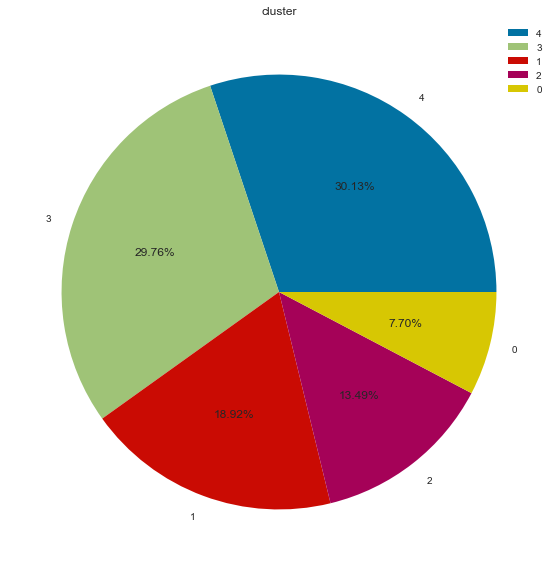

In [385]:
plt.subplots(figsize=(10,10))
plt.pie(df_final.agg_labels.value_counts(), labels=df_final.agg_labels.unique(), autopct='%.2f%%')
plt.title('cluster')
plt.legend()

Diketahui label 4 memiliki persentase terbesar melainkan label 0 memiliki persentase terkecil.

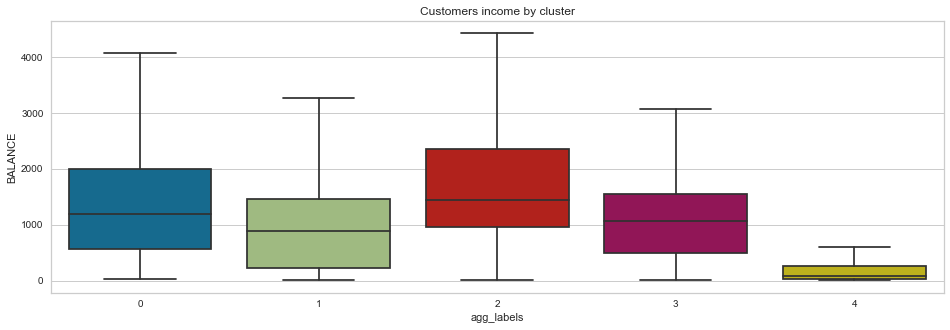

In [372]:
plt.figure(figsize=(16,5))
plt.title('Balance by cluster')
sns.boxplot(data=df_final, x='agg_labels', y='BALANCE', showfliers=False)
plt.show()

Diketahui label 2 memiliki jumlah saldo terbesar yang tersisa di akun pengguna untuk melakukan pembelian.

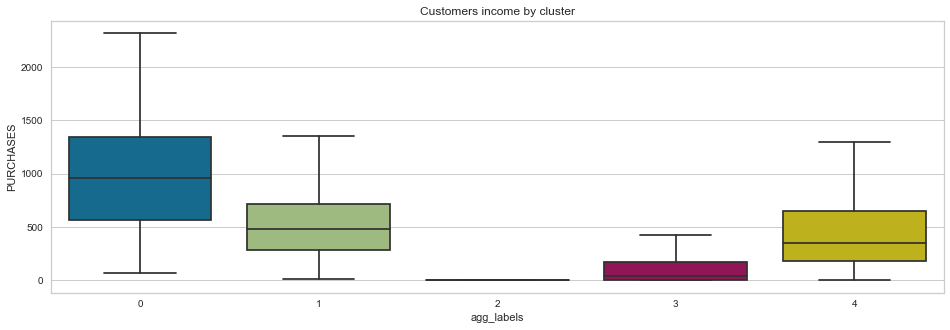

In [373]:
plt.figure(figsize=(16,5))
plt.title('PURCHASES by cluster')
sns.boxplot(data=df_final, x='agg_labels', y='PURCHASES', showfliers=False)
plt.show()

Diketahui label 0 memiliki Jumlah pembelian terbesar yang dilakukan dari akun pengguna.

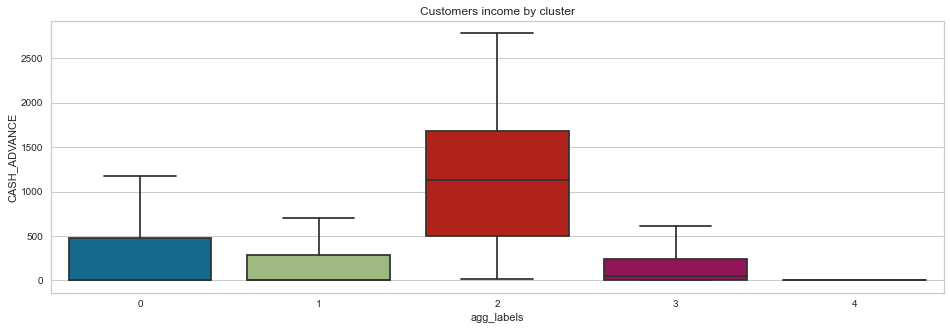

In [374]:
plt.figure(figsize=(16,5))
plt.title('CASH_ADVANCE by cluster')
sns.boxplot(data=df_final, x='agg_labels', y='CASH_ADVANCE', showfliers=False)
plt.show()

Diketahui label 2 memiliki Uang tunai di muka terbanyak yang diberikan oleh pengguna.

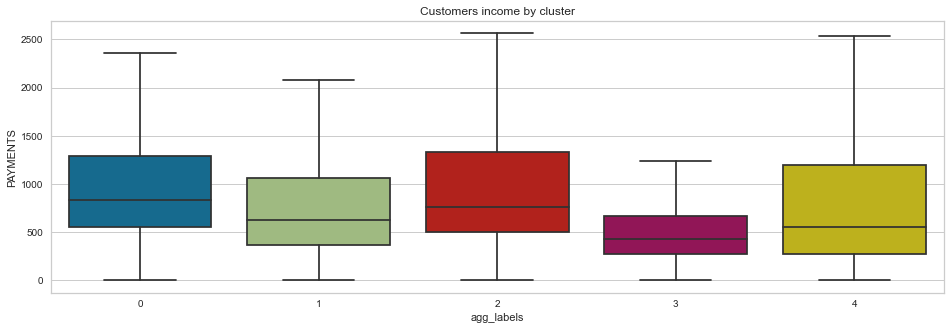

In [375]:
plt.figure(figsize=(16,5))
plt.title('PAYMENTS by cluster')
sns.boxplot(data=df_final, x='agg_labels', y='PAYMENTS', showfliers=False)
plt.show()

Diketahui label 2 memiliki Jumlah Pembayaran terbanyak yang dilakukan oleh pengguna

# IX. Model Inference
> Pada bagian ini tiap model akan diuji dengan menggunakan **10 data inference** yang sudah dipisahkan dari data training dan testing.

In [376]:
df_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4408.966613,1.000000,505.79,112.49,393.30,1601.520906,0.916667,0.166667,0.750000,0.416667,5,12,5000.0,1210.835102,1190.586570,0.0,12
1,330.707721,0.545455,56.40,56.40,0.00,1680.231932,0.083333,0.083333,0.000000,0.166667,3,1,4000.0,3613.150681,205.305914,0.5,12
2,3083.784255,1.000000,0.00,0.00,0.00,737.652849,0.000000,0.000000,0.000000,0.166667,2,0,5500.0,1033.581612,746.430888,0.0,12
3,212.282538,0.545455,1698.90,1698.90,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,10,3000.0,2865.759368,191.098681,1.0,12
4,937.276757,1.000000,45.65,45.65,0.00,19.995297,0.083333,0.083333,0.000000,0.083333,1,1,1000.0,335.809644,442.354727,0.0,12
5,4081.115283,1.000000,1133.98,298.59,835.39,495.425832,1.000000,0.416667,1.000000,0.333333,8,42,8500.0,1532.358832,1051.311348,0.0,12
6,2341.401664,1.000000,0.00,0.00,0.00,1818.306309,0.000000,0.000000,0.000000,0.416667,5,0,3000.0,668.918811,553.243869,0.0,12
7,1963.239125,1.000000,67.55,0.00,67.55,1935.971876,0.250000,0.000000,0.166667,0.333333,6,3,2500.0,459.929854,543.168888,0.0,12
8,125.660453,1.000000,636.79,636.79,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,1200.0,423.449696,196.301885,0.3,12
9,129.613905,0.636364,1083.04,1083.04,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,10,5500.0,1958.462851,87.443335,1.0,12


## IX.I Inference Preprocessing

In [377]:
df_inf_final = scaler.transform(df_inf)

df_inf_final = df_pca.transform(df_inf_final)

## IX.II. Prediction

In [378]:
y_pred_inf = model_agg.fit_predict(df_inf_final)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Label Prediction'])
y_pred_inf

,Label Prediction
0,2
1,4
2,0
3,1
4,0
5,2
6,0
7,0
8,3
9,1


In [379]:
pd.concat([df_inf.reset_index(drop=True), y_pred_inf], axis=1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label Prediction
0,4408.966613,1.000000,505.79,112.49,393.30,1601.520906,0.916667,0.166667,0.750000,0.416667,5,12,5000.0,1210.835102,1190.586570,0.0,12,2
1,330.707721,0.545455,56.40,56.40,0.00,1680.231932,0.083333,0.083333,0.000000,0.166667,3,1,4000.0,3613.150681,205.305914,0.5,12,4
2,3083.784255,1.000000,0.00,0.00,0.00,737.652849,0.000000,0.000000,0.000000,0.166667,2,0,5500.0,1033.581612,746.430888,0.0,12,0
3,212.282538,0.545455,1698.90,1698.90,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,10,3000.0,2865.759368,191.098681,1.0,12,1
4,937.276757,1.000000,45.65,45.65,0.00,19.995297,0.083333,0.083333,0.000000,0.083333,1,1,1000.0,335.809644,442.354727,0.0,12,0
5,4081.115283,1.000000,1133.98,298.59,835.39,495.425832,1.000000,0.416667,1.000000,0.333333,8,42,8500.0,1532.358832,1051.311348,0.0,12,2
6,2341.401664,1.000000,0.00,0.00,0.00,1818.306309,0.000000,0.000000,0.000000,0.416667,5,0,3000.0,668.918811,553.243869,0.0,12,0
7,1963.239125,1.000000,67.55,0.00,67.55,1935.971876,0.250000,0.000000,0.166667,0.333333,6,3,2500.0,459.929854,543.168888,0.0,12,0
8,125.660453,1.000000,636.79,636.79,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,1200.0,423.449696,196.301885,0.3,12,3
9,129.613905,0.636364,1083.04,1083.04,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,10,5500.0,1958.462851,87.443335,1.0,12,1


# X. Pengambilan Kesimpulan

Kesimpulan yang dapat ditarik yaitu :

Dataset ini merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File berada pada level pelanggan dengan 18 variabel perilaku. Datasat tersebut bertujuan mengembangkan segmentasi pelanggan untuk menentukan strategi pemasaran yang optimal. Diketahui sebelumnya bahwa jangka waktu layanan kartu kredit terlama untuk pengguna memiliki nilai 12, dimana pengguna tersebut 
lebih sering memperbarui saldo apabila dibandingkan dengan jangka waktu/Tenure yang lainnya, memiliki batas Kartu Kredit tertinggi, dan memiliki Jumlah pembelian yang tertinggi.

Dari evaluasi model, diketahui model Agglomerative Clustering memiliki selisih count terkecil antar label, maka model clustering ini akan digunakan sebagai model yang optimal. Label yang paling banyak adalah label 4. Diketahui label 2 memiliki jumlah saldo terbesar yang tersisa di akun pengguna untuk melakukan pembelian, memiliki Uang tunai di muka terbanyak yang diberikan oleh pengguna, dan memiliki Jumlah Pembayaran terbanyak yang dilakukan oleh pengguna, melainkan model 0 memiliki Jumlah pembelian terbesar yang dilakukan dari akun pengguna.

